In [3]:

import light.region_splitting
import vision_models.retina
import vision_models.visualizer

vision_models.retina = reload(vision_models.retina)
vision_models.visualizer = reload(vision_models.visualizer)
light.region_splitting = reload(light.region_splitting)


__author__ = 'bogdanp'


import nengo
import numpy as np
import nengo_spinnaker
from nengo.networks import BasalGanglia

model = nengo.Network("Region splitter test")



with model:
    mock_retina = vision_models.retina.Retina(np.asarray([10, 10]))
    splitter = light.region_splitting.RegionSplitter(mock_retina)

    basal_ganglia = BasalGanglia(9, 100)

    for x in range(splitter.regions.shape[0]):
        for y in range(splitter.regions.shape[1]):
            nengo.Connection(splitter.regions[x][y], basal_ganglia.input[x+y])
    
    selected_action = nengo.Probe(basal_ganglia.output, synapse=0.01)
    

AttributeError: 'module' object has no attribute 'utils'

In [3]:
sim = nengo.Simulator(model)
# This will take a while
sim.run(2)

Simulation finished in 0:02:51.                                                 


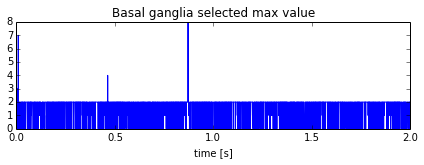

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(2, 1, 2)
plt.plot(sim.trange(), sim.data[selected_action].argmax(axis=1))
# plt.ylim(-0.1, 2.1)
plt.xlabel('time [s]')
plt.title("Basal ganglia selected max value")
plt.tight_layout()

In [11]:
import nengo_spinnaker
spinn_sim = nengo_spinnaker.Simulator(model)
with spinn_sim:
    spinn_sim.run(2)

TypeError: cached_solver() takes at least 6 arguments (3 given)

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(spinn_sim.trange(), spinn_sim.data[selected_action].argmax(axis=1))
plt.ylim(-0.1, 2.1)
plt.xlabel('time [s]')
plt.title("Basal ganglia selected max value")
plt.tight_layout()